# Homework 7 - NumPy and Vectorization

by Michael Moen

## Exercise 1: Plotting Curves with Matplotlib

### Part (a): Cartesian Plot

Plot the curves $y = \sin(x^2)$ and $y = e^{-x^2}$ on the same coordinate system.

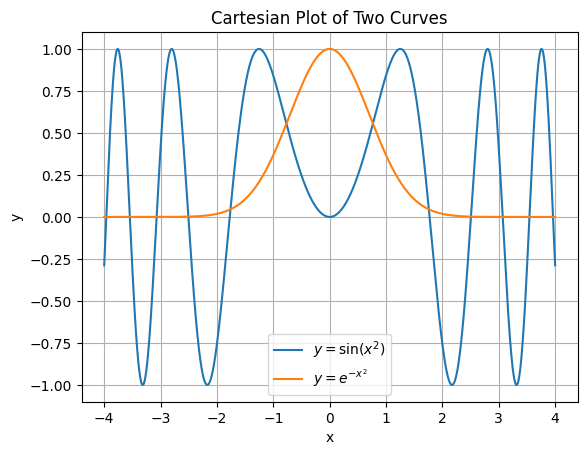

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)

# Create y vectors for the curves
y1 = np.sin(x**2)
y2 = np.exp(-x**2)

# Plot the curves
plt.plot(x, y1, label=r"$y = \sin(x^2)$")
plt.plot(x, y2, label=r"$y = e^{-x^2}$")

# Add title and axis labels
plt.title("Cartesian Plot of Two Curves")
plt.xlabel("x")
plt.ylabel("y")

# Add gridlines and legend
plt.grid(True)
plt.legend()

plt.show()

### Part (b): Polar Plot

Plot the polar curves:

$$ r = 5 - 9\cos(\theta) $$

$$ r = e^{\sin(\theta)} - 2\cos(4\theta) + \sin^5(\frac{2\theta - \pi}{24}) $$

Create a subplot with 2 rows and 1 column for polar plots, ensuring each subplot has a title describing the curve.

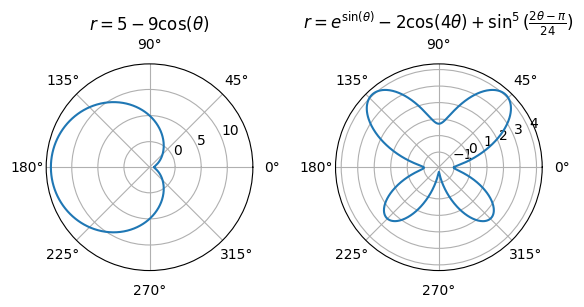

In [ ]:
theta = np.linspace(0, 2 * np.pi, 1000)

# Create r vectors for the curves
r1 = 5 - 9 * np.cos(theta)
r2 = np.exp(np.sin(theta)) - 2 * np.cos(4 * theta) + np.sin((2 * theta - np.pi) / 24)**5

# Plot the first function
plt.subplot(1, 2, 1, polar=True)
plt.plot(theta, r1)
plt.title(r"$r = 5 - 9\cos(\theta)$")

# Add buffer space between subplots
plt.subplots_adjust(wspace=0.4)

# Plot the second function
plt.subplot(1, 2, 2, polar=True)
plt.plot(theta, r2)
plt.title(r"$r = e^{\sin(\theta)} - 2\cos(4\theta) + \sin^5(\frac{2\theta - \pi}{24})$")

plt.show()

## Exercise 2: Computing an Integral Using Two Approaches

In this exercise, you will compute the integral of a function using two distinct approaches: a pure Python loop and NumPy’s vectorized operations. The objective is to compare the efficiency of both methods in terms of execution time. You will integrate the function $f(x) = \sin(x^2)$ over the interval
$[0, 2]$. We will only use the trapezoidal rule for the numerical integral in this problem.

### Task 1: Pure Python Loop

Write a function using **pure Python loops** to compute the integral

$$ \int_0^2 \sin(x^2) dx $$

The function must return both the integral's value and the computation time.

In [ ]:
import time

def loop_trapz_int(f, a: float, b: float, n: int) -> tuple:
    """Calculate an integral using the trapezoid method and Python loops

    Parameters
    ----------
    f : function
        the function to integrate
    a : float
        the lower bound of the integral
    b : float
        the upper bound of the integral
    n : int
        the number of trapeoids
    
    Returns
    -------
    float
        the value of the integral
    int
        the computation time
    """
    start_time = time.time()
    int_val = 0
    
    interval_width = (b - a) / n
    for i in range(1, n + 1):
        xi = a + i * interval_width
        xj = a + (i - 1) * interval_width
        int_val += (f(xi) + f(xj)) / 2
    int_val *= interval_width

    end_time = time.time()
    computed_time = end_time - start_time

    return int_val, computed_time

In [ ]:
import math

def f_loop(x):
    return math.sin(x**2)

a = 0
b = 2
n = 1000

int_val, computed_time = loop_trapz_int(f_loop, a, b, n)
print(f"Integral approximation (sec): {int_val}")
print(f"Computation time (sec):       {computed_time}")

Integral approximation (sec): 0.8047756178175947
Computation time (sec):       0.0019965171813964844


### Task 2: NumPy Vectorization

Write a Python function that calculates the definite integral of a given function over a specified integral using the trapezoidal rule. The implementation should specifically make use of NumPy for:
- Generating an array of $n$ equally spaced values within the interval
- Utilizing NumPy's vectorized operations to efficiently compute the function values at those points
- Employing NumPy's summing functionality to aggregate these values into an approximation of the integral

In [ ]:
import numpy as np
import time

def np_trapz_int(f, a: float, b: float, n: int) -> tuple:
    """Calculate an integral using the trapezoid method and NumPy vectors

    Parameters
    ----------
    f : function
        the function to integrate
    a : float
        the lower bound of the integral
    b : float
        the upper bound of the integral
    n : int
        the number of trapeoids
    
    Returns
    -------
    float
        the value of the integral
    int
        the computation time
    """
    start_time = time.time()
    
    interval_width = (b - a) / n
    x = np.linspace(a, b, n+1)
    areas = ((f(x[1:]) + f(x[:-1])) / 2)
    int_val = areas.sum() * interval_width

    end_time = time.time()
    computed_time = end_time - start_time

    return int_val, computed_time

In [ ]:
def f_np(x):
    return np.sin(x**2)

a = 0
b = 2
n = 1000

int_val, computed_time = loop_trapz_int(f_loop, a, b, n)
print(f"Integral approximation (sec): {int_val}")
print(f"Computation time (sec):       {computed_time}")

Integral approximation (sec): 0.8047756178175947
Computation time (sec):       0.00237274169921875


### Task 3: Benchmark These Approaches

Use both your loop-based and NumPy vectorized functions that perform the computation of the integral to benchmark the computation time. Plot the computed time results of these approaches against the number of iterations $n$.

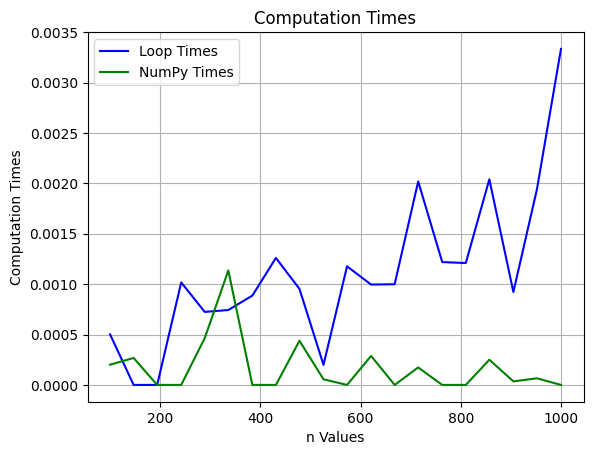

In [ ]:
import matplotlib.pyplot as plt

n_values = np.linspace(100, 1000, 20, dtype=int)
a = 0
b = 2

# Benchmarking the computation time for both approaches
loop_times = [loop_trapz_int(f_loop, a, b, n)[1] for n in n_values]
np_times = [np_trapz_int(f_np, a, b, n)[1] for n in n_values]

# Plot the results
plt.plot(n_values, loop_times, label='Loop Times', color='blue')
plt.plot(n_values, np_times, label='NumPy Times', color='green')

# Add title and axis labels
plt.title("Computation Times")
plt.xlabel("n Values")
plt.ylabel("Computation Times")

# Add gridlines and legend
plt.grid(True)
plt.legend()

plt.show()

## Exercise 3: Solving Matrix Equations

You are given a non-singular square matrix $A$ of size $n \times n$ and a matrix $B$ of size $n \times m$. Your task is to solve the equation $AX = B$ for $X$, where $X$ is an unknown matrix of size $n \times m$.

You are not allowed to use NumPy’s direct inverse and multiplication functions. Instead, you should implement Cramer’s Rule to solve the equation for each column $v$ of matrix $B$, then collect the solutions to form the matrix $X$.

For each column $v$ in matrix $B$:
1. Implement Cramer’s Rule to solve the equation $Ax = v$ for $x$.
2. Remember that Cramer’s Rule involves calculating determinants. You can use NumPy’s `np.linalg.det()` function to compute determinants.
3. Collect the solutions obtained for each column $v$ to form the matrix $X$.
4. Return the matrix $X$.

In [ ]:
def solve_equation(A, B):
    """Solve the matrix equation

    Parameters
    ----------
    A : numpy 2d array of size n x m
    B : numpy 2d array of size n x n
    
    Returns
    -------
    numpy 2d array
        the solution vector X of size n x m
    """
    n = len(A)
    m = len(B[0])
    X = np.zeros((n, m))
    det_A = np.linalg.det(A)
    
    for i in range(m):
        v = B[:, i]
        for j in range(n):
            Aj = A.copy()
            Aj[:, j] = v
            det_Aj = np.linalg.det(Aj)
            X[j, i] = det_Aj / det_A

    return X

In [ ]:
A = np.array([[2, 1, 4, 0], [1, 3, 2, 3], [3, 4, 0, 0], [4, 2, 3, 1]])
B = np.array([[1, 5], [2, 6], [3, 7], [4, 8]])
X = solve_equation(A, B)

print("Solution matrix X:")
print(X)

Solution matrix X:
[[ 1.11428571  1.07619048]
 [-0.08571429  0.94285714]
 [-0.28571429  0.47619048]
 [ 0.57142857  0.38095238]]


In [ ]:
np.dot(A, X)

array([[1., 5.],
       [2., 6.],
       [3., 7.],
       [4., 8.]])